https://dacon.io/competitions/official/235961/data

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [244]:
PATH = "/Users/jahyeon_gu/Downloads/weed"

glob(f"{PATH}/train_input/*csv")[:5]

['/Users/jahyeon_gu/Downloads/weed/train_input/CASE_58.csv',
 '/Users/jahyeon_gu/Downloads/weed/train_input/CASE_48.csv',
 '/Users/jahyeon_gu/Downloads/weed/train_input/CASE_49.csv',
 '/Users/jahyeon_gu/Downloads/weed/train_input/CASE_05.csv',
 '/Users/jahyeon_gu/Downloads/weed/train_input/CASE_11.csv']

In [245]:
# train 파일 개수
len(glob(f"{PATH}/train_input/*csv"))

58

In [246]:
# test가 어떻게 생겼나
pd.read_csv(glob(f"{PATH}/test_target/*csv")[0]).head()

,시간,rate
0,2021-04-26 00:00:00,0
1,2021-04-27 00:00:00,0
2,2021-04-28 00:00:00,0
3,2021-04-29 00:00:00,0
4,2021-04-30 00:00:00,0


In [247]:
# train은 어떻게 생겼나
pd.read_csv(glob(f"{PATH}/train_input/*csv")[0]).head()

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,펌프최근분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2022-05-21 00:00:00,20.5,68.400002,561.0,4.850366,23.900000,45.799999,0,0,769,...,0,16.0,14.0,15.0,0.0,32.500000,0.0,0.0,0.0,0.0
1,2022-05-21 00:01:00,20.6,68.599998,561.0,4.847499,23.799999,45.799999,201,87,769,...,0,16.0,14.0,15.0,0.0,32.500000,0.0,0.0,0.0,0.0
2,2022-05-21 00:02:00,20.6,68.800003,562.0,4.846543,23.900000,45.799999,0,0,769,...,0,16.0,14.0,15.0,0.0,32.500000,0.0,0.0,0.0,0.0
3,2022-05-21 00:03:00,20.6,69.000000,563.0,4.850366,23.900000,45.799999,0,0,769,...,0,16.0,14.0,15.0,0.0,33.000002,0.0,0.0,0.0,0.0
4,2022-05-21 00:04:00,20.6,69.000000,564.0,4.848455,23.799999,45.700001,0,0,769,...,0,16.0,14.0,15.0,0.0,33.000002,0.0,0.0,0.0,0.0


In [248]:
pd.read_csv(glob(f"{PATH}/train_target/*csv")[0]).head()

,시간,rate
0,2022-05-22 00:00:00,0.21891
1,2022-05-23 00:00:00,0.22449
2,2022-05-24 00:00:00,0.27667
3,2022-05-25 00:00:00,0.22977
4,2022-05-26 00:00:00,0.24416


In [249]:
# train 파일의 label은 어떻게 생겼나
pd.read_csv(glob(f"{PATH}/train_target/*csv")[0]).head()

,시간,rate
0,2022-05-22 00:00:00,0.21891
1,2022-05-23 00:00:00,0.22449
2,2022-05-24 00:00:00,0.27667
3,2022-05-25 00:00:00,0.22977
4,2022-05-26 00:00:00,0.24416


# 전처리
* 결측치를 보간법으로 채움
* 파생변수 : 연, 월, 일, 시간 생성
* 학습 시 자정 데이터만 쓰는게 더 좋을까?

## 파생변수

In [250]:
df = pd.read_csv(glob(f"{PATH}/train_input/*csv")[0])
df.head()

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,펌프최근분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2022-05-21 00:00:00,20.5,68.400002,561.0,4.850366,23.900000,45.799999,0,0,769,...,0,16.0,14.0,15.0,0.0,32.500000,0.0,0.0,0.0,0.0
1,2022-05-21 00:01:00,20.6,68.599998,561.0,4.847499,23.799999,45.799999,201,87,769,...,0,16.0,14.0,15.0,0.0,32.500000,0.0,0.0,0.0,0.0
2,2022-05-21 00:02:00,20.6,68.800003,562.0,4.846543,23.900000,45.799999,0,0,769,...,0,16.0,14.0,15.0,0.0,32.500000,0.0,0.0,0.0,0.0
3,2022-05-21 00:03:00,20.6,69.000000,563.0,4.850366,23.900000,45.799999,0,0,769,...,0,16.0,14.0,15.0,0.0,33.000002,0.0,0.0,0.0,0.0
4,2022-05-21 00:04:00,20.6,69.000000,564.0,4.848455,23.799999,45.700001,0,0,769,...,0,16.0,14.0,15.0,0.0,33.000002,0.0,0.0,0.0,0.0


In [251]:
df["시간"].dtype

dtype('O')

In [252]:
df["시간"] = pd.to_datetime(df["시간"])

# 뭐지 이건
df["시간"].dtype

dtype('<M8[ns]')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   시간             36000 non-null  datetime64[ns]
 1   내부온도관측치        36000 non-null  float64       
 2   내부습도관측치        36000 non-null  float64       
 3   CO2관측치         36000 non-null  float64       
 4   EC관측치          36000 non-null  float64       
 5   외부온도관측치        36000 non-null  float64       
 6   외부습도관측치        36000 non-null  float64       
 7   펌프상태           36000 non-null  int64         
 8   펌프작동남은시간       36000 non-null  int64         
 9   펌프최근분무량        36000 non-null  int64         
 10  펌프일간누적분무량      36000 non-null  float64       
 11  냉방상태           36000 non-null  int64         
 12  냉방작동남은시간       36000 non-null  float64       
 13  난방상태           36000 non-null  int64         
 14  난방작동남은시간       36000 non-null  int64         
 15  내부유동팬상태        3600

In [254]:
df["연"] = df["시간"].dt.year
df["월"] = df["시간"].dt.month
df["일"] = df["시간"].dt.day
df["시"] = df["시간"].dt.hour
df["분"] = df["시간"].dt.minute

In [255]:
df[["시간", "연", "월", "일", "시", "분"]]

,시간,연,월,일,시,분
0,2022-05-21 00:00:00,2022,5,21,0,0
1,2022-05-21 00:01:00,2022,5,21,0,1
2,2022-05-21 00:02:00,2022,5,21,0,2
3,2022-05-21 00:03:00,2022,5,21,0,3
4,2022-05-21 00:04:00,2022,5,21,0,4
...,...,...,...,...,...,...
35995,2022-06-14 23:55:00,2022,6,14,23,55
35996,2022-06-14 23:56:00,2022,6,14,23,56
35997,2022-06-14 23:57:00,2022,6,14,23,57
35998,2022-06-14 23:58:00,2022,6,14,23,58


## 보간

In [64]:
df = pd.read_csv(glob(f"{PATH}/train_input/*csv")[10])
df.isnull().sum().sum()

37

In [126]:
# 엄청 많네
for link in glob(f"{PATH}/train_input/*csv")[:10]:
    df = pd.read_csv(link)
    print(df.isnull().sum().sum())

0
4847
107895
0
0
127700
552003
0
37
0


In [65]:
# 필요한 변수들만 골라서 보간 하자
df.columns

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량'],
      dtype='object')

In [154]:
temp_x = sorted(glob(f"{PATH}/train_input/*csv"))[1]
temp_y = sorted(glob(f"{PATH}/train_target/*csv"))[1]

print(temp_x)
print(temp_y)

/Users/jahyeon_gu/Downloads/weed/train_input/CASE_02.csv
/Users/jahyeon_gu/Downloads/weed/train_target/CASE_02.csv


In [155]:
temp_x = pd.read_csv(temp_x)
temp_y = pd.read_csv(temp_y)

In [156]:
# default : inner
temp_df = pd.merge(temp_x, temp_y,)
temp_df.head()

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,rate
0,2021-03-27 00:00:00,26.600000,42.900002,473.0,1.525249,28.100000,20.500000,0.0,0.0,0.0,...,21.0,20.0,20.5,0.0,28.000002,0.0,0.0,0.0,0.0,0.38462
1,2021-03-28 00:00:00,31.799999,54.400002,431.0,1.512297,34.500000,27.700001,0.0,0.0,0.0,...,21.0,20.0,20.5,0.0,53.999996,0.0,0.0,0.0,0.0,0.11111
2,2021-03-29 00:00:00,31.799999,53.799999,442.0,1.538200,34.500000,21.100000,0.0,0.0,0.0,...,21.0,20.0,20.5,0.0,53.999996,0.0,0.0,0.0,0.0,0.30000
3,2021-03-30 00:00:00,31.799999,49.099998,437.0,1.537337,34.400002,11.800000,0.0,0.0,0.0,...,21.0,20.0,20.5,0.0,53.999996,0.0,0.0,0.0,0.0,0.38462
4,2021-03-31 00:00:00,23.299999,52.900002,463.0,1.606413,24.000000,21.900000,0.0,0.0,0.0,...,21.0,20.0,20.5,0.0,11.499996,0.0,0.0,0.0,0.0,0.25000


In [112]:
temp_df.isnull().sum().sum()

0

In [114]:
# NaN인 애들은 뭘까, 0 or 결측치가 많아서 그런가
pd.DataFrame(temp_df.corr()["rate"])

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_24030/1059471623.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(temp_df.corr()["rate"])


,rate
내부온도관측치,0.010954
내부습도관측치,-0.201003
CO2관측치,-0.574888
EC관측치,0.602711
외부온도관측치,0.019878
외부습도관측치,0.060247
펌프상태,NaN
펌프작동남은시간,NaN
최근분무량,NaN
일간누적분무량,NaN


In [117]:
temp_df.columns

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량', 'rate'],
      dtype='object')

In [256]:
# 낮은 상관계수, **작동남은시간, 시간 제거
features = ['CO2관측치', 'EC관측치', '펌프상태', '최근분무량', '냉방상태', '난방상태',
        '내부유동팬상태', '화이트 LED상태', '화이트 LED동작강도', '레드 LED상태',
       '레드 LED동작강도', '블루 LED상태', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량', "rate"
       "연", 
       "월", 
       "일", 
       "시", 
       "분"]

In [129]:
temp_x = sorted(glob(f"{PATH}/train_input/*csv"))[5]
temp_x = pd.read_csv(temp_x)
print(temp_x.isnull().sum().sum())

37


In [145]:
def bogan(df):
    for col in features[:-6]:
        df[f"{col}_ip"] = df[col].interpolate(method="linear", limit_direction="both")

In [146]:
bogan(temp_df)

In [147]:
temp_df.columns

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량', 'rate', 'CO2관측치_ip', 'EC관측치_ip', '펌프상태_ip', '최근분무량_ip',
       '일간누적분무량_ip', '냉방상태_ip', '난방상태_ip', '내부유동팬상태_ip', '화이트 LED상태_ip',
       '화이트 LED동작강도_ip', '레드 LED상태_ip', '레드 LED동작강도_ip', '블루 LED상태_ip',
       '블루 LED동작강도_ip', '카메라상태_ip', '냉방온도_ip', '난방온도_ip', '기준온도_ip',
       '총추정광량_ip', '백색광추정광량_ip', '적색광추정광량_ip', '청색광추정광량_ip'],
      dtype='object')

In [206]:
features_ip = ['CO2관측치_ip', 'EC관측치_ip', '냉방상태_ip',
        '화이트 LED상태_ip', '레드 LED상태_ip', '블루 LED상태_ip', '냉방온도_ip',
       '난방온도_ip', '기준온도_ip', "rate", "연", "월", "일", "시", "분"]

In [207]:
def preprocessing_train(df):
    # 연월일시 파생변수
    df["시간"] = pd.to_datetime(df["시간"])
    df["연"] = df["시간"].dt.year
    df["월"] = df["시간"].dt.month
    df["일"] = df["시간"].dt.day
    df["시"] = df["시간"].dt.hour
    df["분"] = df["시간"].dt.minute

    # 보간법
    features = ['CO2관측치', 'EC관측치', '냉방상태', '화이트 LED상태', '레드 LED상태',
        '블루 LED상태', '냉방온도', '난방온도', '기준온도', "rate", "연", "월", "일", "시", "분"]
    for col in features[:-6]:
        df[f"{col}_ip"] = df[col].interpolate(method="linear", limit_direction="both")

In [208]:
def merge_data():
    # 최종 df
    df_final = pd.DataFrame(columns= features_ip)

    # features, label 경로들
    paths_x = sorted(glob(f"{PATH}/train_input/*csv"))
    paths_y = sorted(glob(f"{PATH}/train_target/*csv"))

    # 하나씩 불러와서
    for path_x, path_y in zip(paths_x, paths_y):
        df_x = pd.read_csv(path_x)
        df_y = pd.read_csv(path_y)
        
        # 결합
        df_merge = pd.merge(df_x, df_y)

        # 전처리 함수
        preprocessing_train(df_merge)

        # 최종 df 아래에 concat
        df_final = pd.concat([df_final, df_merge[features_ip]])
    
    return df_final

In [209]:
df = merge_data()
df

,CO2관측치_ip,EC관측치_ip,냉방상태_ip,화이트 LED상태_ip,레드 LED상태_ip,블루 LED상태_ip,냉방온도_ip,난방온도_ip,기준온도_ip,rate,연,월,일,시,분
0,426.0,0.906247,0.0,201.0,201.0,201.0,20.0,18.0,19.0,0.50000,2021,2,18,0,0
1,361.0,0.896144,0.0,201.0,201.0,201.0,20.0,18.0,19.0,0.66667,2021,2,19,0,0
2,352.0,0.899252,0.0,201.0,201.0,201.0,20.0,18.0,19.0,0.60000,2021,2,20,0,0
3,344.0,0.907025,201.0,201.0,201.0,201.0,20.0,18.0,19.0,-0.12500,2021,2,21,0,0
4,362.0,0.908579,201.0,201.0,201.0,201.0,20.0,18.0,19.0,1.42857,2021,2,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,508.0,0.013184,201.0,201.0,201.0,201.0,16.0,14.0,15.0,-0.08958,2022,6,10,0,0
20,527.0,0.012408,201.0,201.0,201.0,201.0,16.0,14.0,15.0,-0.07888,2022,6,11,0,0
21,525.0,0.010857,201.0,201.0,201.0,201.0,16.0,14.0,15.0,-0.15838,2022,6,12,0,0
22,427.0,0.010857,201.0,201.0,201.0,201.0,16.0,14.0,15.0,-0.47374,2022,6,13,0,0


In [210]:
df.columns

Index(['CO2관측치_ip', 'EC관측치_ip', '냉방상태_ip', '화이트 LED상태_ip', '레드 LED상태_ip',
       '블루 LED상태_ip', '냉방온도_ip', '난방온도_ip', '기준온도_ip', 'rate', '연', '월', '일',
       '시', '분'],
      dtype='object')

In [211]:
label = "rate"
features = ['CO2관측치_ip', 'EC관측치_ip', '냉방상태_ip', '화이트 LED상태_ip', '레드 LED상태_ip',
       '블루 LED상태_ip', '냉방온도_ip', '난방온도_ip', '기준온도_ip', '연', '월', '일',
       '시', '분']

In [212]:
x = df[features]
y = df[label]

x.shape, y.shape


((1755, 14), (1755,))

# train_test_split

In [226]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [227]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1404, 14), (351, 14), (1404,), (351,))

In [228]:
# ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 25 to 39
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO2관측치_ip     1404 non-null   float64
 1   EC관측치_ip      1404 non-null   float64
 2   냉방상태_ip       1404 non-null   float64
 3   화이트 LED상태_ip  1404 non-null   float64
 4   레드 LED상태_ip   1404 non-null   float64
 5   블루 LED상태_ip   1404 non-null   float64
 6   냉방온도_ip       1404 non-null   float64
 7   난방온도_ip       1404 non-null   float64
 8   기준온도_ip       1404 non-null   float64
 9   연             1404 non-null   object 
 10  월             1404 non-null   object 
 11  일             1404 non-null   object 
 12  시             1404 non-null   object 
 13  분             1404 non-null   object 
dtypes: float64(9), object(5)
memory usage: 164.5+ KB


In [229]:
x_train[["연", "월", "일", "시", "분"]] = x_train[["연", "월", "일", "시", "분"]].astype(np.float32)
x_val[["연", "월", "일", "시", "분"]] = x_val[["연", "월", "일", "시", "분"]].astype(np.float32)

In [230]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 25 to 39
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO2관측치_ip     1404 non-null   float64
 1   EC관측치_ip      1404 non-null   float64
 2   냉방상태_ip       1404 non-null   float64
 3   화이트 LED상태_ip  1404 non-null   float64
 4   레드 LED상태_ip   1404 non-null   float64
 5   블루 LED상태_ip   1404 non-null   float64
 6   냉방온도_ip       1404 non-null   float64
 7   난방온도_ip       1404 non-null   float64
 8   기준온도_ip       1404 non-null   float64
 9   연             1404 non-null   float32
 10  월             1404 non-null   float32
 11  일             1404 non-null   float32
 12  시             1404 non-null   float32
 13  분             1404 non-null   float32
dtypes: float32(5), float64(9)
memory usage: 137.1 KB


# Model

In [222]:
input_shape = x_train.shape[1]
input_shape

14

In [223]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])
  
optimizer = tf.keras.optimizers.RMSprop(0.001)     
  
model.compile(optimizer=optimizer, 
              loss=["mae", "mse"], 
              metrics=["mae", "mse"])

In [233]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=100)
history = model.fit(x_train, y_train, epochs=1000, verbose=1,
                    callbacks=[early_stop], validation_split=0.2)

Epoch 1/1000
11/36 [========>.....................] - ETA: 0s - loss: 0.2606 - mae: 0.2606 - mse: 1.1301

/Users/jahyeon_gu/tensorflow3.8/envs/tf-cert/lib/python3.8/site-packages/keras/engine/data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


36/36 [==============================] - 0s 12ms/step - loss: 0.3369 - mae: 0.3369 - mse: 3.7958 - val_loss: 0.2043 - val_mae: 0.2043 - val_mse: 0.1120
Epoch 2/1000
36/36 [==============================] - 0s 13ms/step - loss: 0.3498 - mae: 0.3498 - mse: 3.8097 - val_loss: 0.2334 - val_mae: 0.2334 - val_mse: 0.1412
Epoch 3/1000
36/36 [==============================] - 0s 12ms/step - loss: 0.3436 - mae: 0.3436 - mse: 3.8177 - val_loss: 0.3283 - val_mae: 0.3283 - val_mse: 0.2127
Epoch 4/1000
36/36 [==============================] - 0s 12ms/step - loss: 0.3418 - mae: 0.3418 - mse: 3.8203 - val_loss: 0.2114 - val_mae: 0.2114 - val_mse: 0.1137
Epoch 5/1000
36/36 [==============================] - 0s 12ms/step - loss: 0.3438 - mae: 0.3438 - mse: 3.8208 - val_loss: 0.3628 - val_mae: 0.3628 - val_mse: 0.1905
Epoch 6/1000
36/36 [==============================] - 0s 11ms/step - loss: 0.3514 - mae: 0.3514 - mse: 3.8196 - val_loss: 0.2588 - val_mae: 0.2588 - val_mse: 0.1307
Epoch 7/1000
36/36 [===

In [234]:
df_hist = pd.DataFrame(history.history)
df_hist.tail(3)

,loss,mae,mse,val_loss,val_mae,val_mse
134,0.350359,0.350359,3.832634,0.268434,0.268434,0.135080
135,0.339178,0.339178,3.806514,0.261280,0.261280,0.164767
136,0.340091,0.340091,3.816920,0.239784,0.239784,0.146674


<AxesSubplot: >

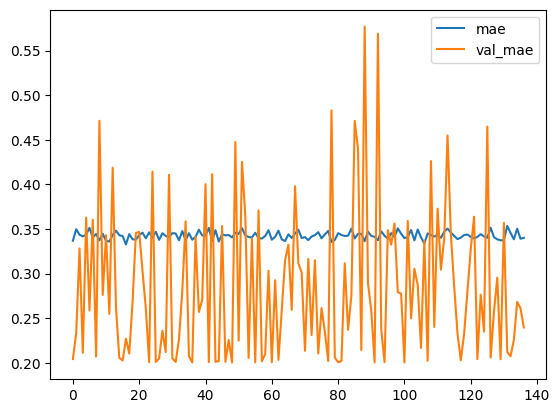

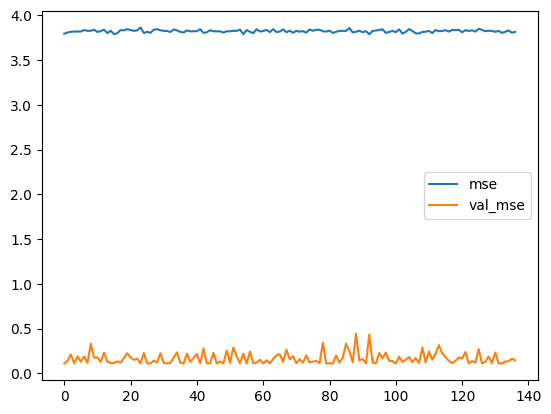

In [235]:
df_hist[["mae", "val_mae"]].plot()
df_hist[["mse", "val_mse"]].plot()

In [ ]:
y_pred = model.predict(test_X)
y_pred.shape